In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:70% !important; height:70% !important;}</style>"

In [4]:
# Загрузка датасета Titanic (в формате CSV)
data = pd.read_csv('titanic.csv')

data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
alive = data.\
    query("Survived == 1")

<AxesSubplot:>

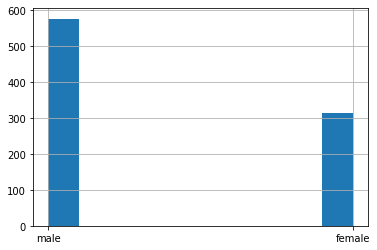

In [6]:
data.Sex.hist()

<AxesSubplot:>

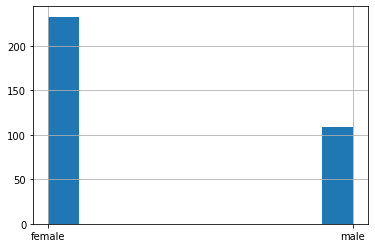

In [7]:
alive.Sex.hist()

In [8]:
# Удаление ненужных столбцов
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [9]:
# Заполнение пропущенных значений
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())


In [10]:
# Преобразование категориальных признаков в числовые
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})


In [11]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [12]:
# Разделение данных на признаки и метки классов
X = data.drop('Survived', axis=1)
y = data['Survived']

In [13]:
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Создание и обучение решающего дерева
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [15]:
# Прогнозирование на тестовых данных
y_pred = clf.predict(X_test)


In [16]:
row = X_test.iloc[18]
row

Pclass     2.0
Sex        1.0
Age       27.0
SibSp      0.0
Parch      0.0
Fare      13.0
Name: 886, dtype: float64

In [17]:
y_pred_2 = clf.predict([row])
y_pred_2

c:\Users\Sehii\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [18]:
row

Pclass     2.0
Sex        1.0
Age       27.0
SibSp      0.0
Parch      0.0
Fare      13.0
Name: 886, dtype: float64

In [19]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
accuracy2 = clf.score(X_test, y_test)
accuracy3 = clf.score(X_train, y_train)


print("Accuracy:", accuracy)
print("Accuracy:", accuracy2)
print("Accuracy:", accuracy3)

Accuracy: 0.8268156424581006
Accuracy: 0.8268156424581006
Accuracy: 0.9171348314606742


In [20]:
max_depth_values = range(1, 100)

In [21]:
scores_data = pd.DataFrame()

In [22]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({
        "max_depth":[max_depth],
        "train_score":[train_score],
        "test_score":[test_score],
        "cross_val_score":[mean_cross_val_score],
    })
    scores_data = scores_data.append(temp_score_data)


C:\Users\Sehii\AppData\Local\Temp\ipykernel_22520\2313893142.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Sehii\AppData\Local\Temp\ipykernel_22520\2313893142.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Sehii\AppData\Local\Temp\ipykernel_22520\2313893142.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


C:\Users\Sehii\AppData\Local\Temp\ipykernel_22520\2313893142.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Sehii\AppData\Local\Temp\ipykernel_22520\2313893142.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Sehii\AppData\Local\Temp\ipykernel_22520\2313893142.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Sehii\AppData\Local\Temp\ipykernel_22520\2313893142.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

In [23]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.787921,0.782123,0.787876
0,2,0.803371,0.765363,0.786467
0,3,0.834270,0.798883,0.823008
0,4,0.835674,0.798883,0.813169
0,5,0.849719,0.770950,0.811770
...,...,...,...,...
0,95,0.978933,0.770950,0.762691
0,96,0.978933,0.770950,0.773939
0,97,0.978933,0.770950,0.769713
0,98,0.978933,0.759777,0.768275


In [24]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"], value_vars = ['train_score', 'test_score'],
                           var_name = "set_type", value_name = "score")

In [25]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.787921
1,2,train_score,0.803371
2,3,train_score,0.834270
3,4,train_score,0.835674
4,5,train_score,0.849719
...,...,...,...
193,95,test_score,0.770950
194,96,test_score,0.770950
195,97,test_score,0.770950
196,98,test_score,0.759777


In [26]:
# pd.melt(df, id_vars=['A'], value_vars=['B'],
#         var_name='myVarname', value_name='myValname')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

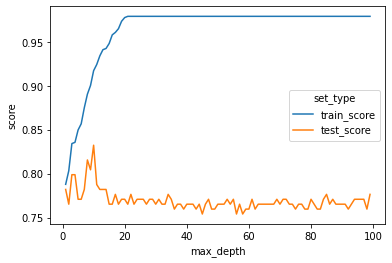

In [27]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [28]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)

clf

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [29]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8019797104304146

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [32]:
parametrs = {"criterion":['gini', 'entropy', 'log_loss'],
             "splitter":['best', 'random'],
             "max_depth": range(1, 30),
            #  "max_features":['auto', 'sqrt', 'log2'],
             }

In [33]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 30),
                         'splitter': ['best', 'random']})

In [34]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 30),
                         'splitter': ['best', 'random']})

In [35]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

In [36]:
best_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 9, max_features = "auto", splitter = "random")

In [37]:
best_clf.fit(X_train, y_train)

c:\Users\Sehii\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='auto',
                       splitter='random')

In [38]:
best_clf_2 = grid_search_cv_clf.best_estimator_

In [39]:
best_clf_2.score(X_test, y_test)

0.7988826815642458

In [40]:
from sklearn.metrics import precision_score, recall_score

In [41]:
y_pred = best_clf_2.predict(X_test)

In [42]:
precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.796875, 0.6891891891891891)

In [43]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
from sklearn.metrics import  plot_roc_curve

c:\Users\Sehii\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


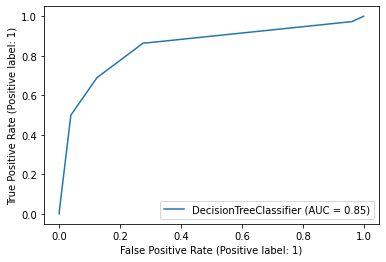

In [ ]:
plot_roc_curve(best_clf_2, X_test, y_test)

In [91]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth = 3, min_samples_leaf=10)
#, min_samples_split=100, min_samples_leaf=10

In [92]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)

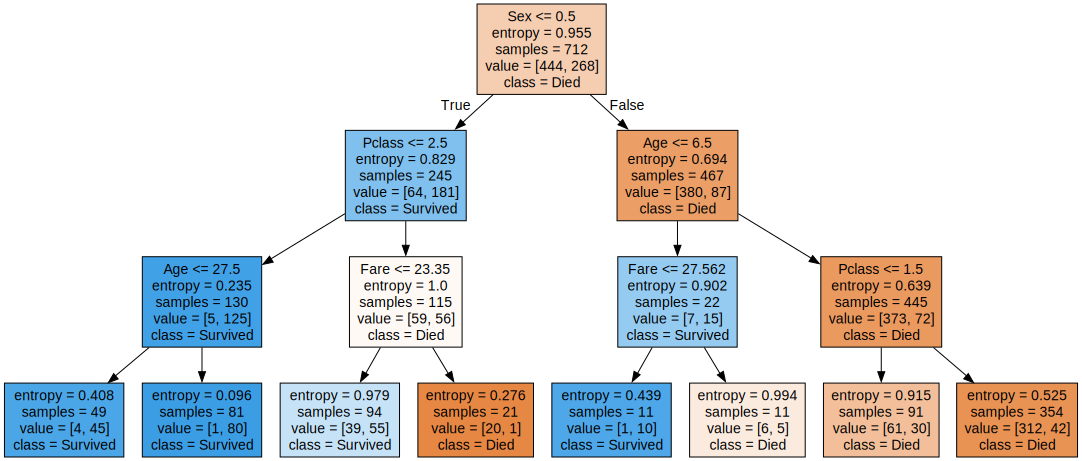

In [93]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=["Died", "Survived"],filled=True))



display(SVG(graph.pipe(format="svg")))

# Решение
min_samples_split(размер ячейки), min_samples_leaf(размер группы)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
clf_rf = RandomForestClassifier()

In [46]:
estimators_range = range(1, 200, 10)
min_samples_split_range = range(2, 100, 10)
min_samples_leaf_range = range(1, 100, 10)
max_depth_range = range(1, 100, 5)

In [47]:
parametrs = {
    "n_estimators":estimators_range,
    "criterion":['gini', 'entropy', 'log_loss'],
    "min_samples_split":min_samples_split_range,
    "min_samples_leaf":min_samples_leaf_range,
    "max_depth": max_depth_range,
}

In [48]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [49]:
grid_search_cv_clf.fit(X_train, y_train)

In [ ]:
grid_search_cv_clf.best_params_

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
feature_importances = best_clf.feature_importances_
feature_importances

In [ ]:
feature_importances_df = pd.DataFrame({"features":list(X_train),
                                    "feature_importances":feature_importances,
                                    })

In [ ]:
feature_importances_df.sort_values("feature_importances", ascending=False)

In [ ]:
sns.barplot(data = feature_importances_df, x = "features", y = "feature_importances")

# Когда использовать деревья

Деревья решений отлично работают когда у нас есть много разных переменных с заметной разницей в значениях. Например размер опухоли или номер палубы. В таких случаях деревья очень легко выделяют главные фичи и зависимости


А в тех ситуациях когда наши данные представляют собой какую то низкоуровневую информацию про обьект, например - закрашен пиксель или нет, деревья работают так себе, потому что имеют свойство переобучатся. (Речь о том что инфа про 1 пиксель не очень влияет на результат в целом)

# Линейные класификаторы

# Как мы можем посчитать вероятность отнесения к какому то классу

Дапустим у нас есть 2 фичи. Х1 и Х2. У этих фичей есть такое значение как вес, тоесть, на сколько сильно значения этих фичей влияют на результат, назовем это W1 и W2. Из этого мы можем сделать вывод что: <br>
y = w1 * x1 + w2 * x2 <br>
Но тут есть один ньюанс. Если использовать эту формулу то мы можем получить как бесконечно большой так и бесконечно малый результат. В решении этого нам поможет логистическая функция f(x)

# Логистическая ф-ция. Далее f(x)

f(x) = 1/(1 + e ** -x)

y = f(w1 * x1 + w2 * x2)

# Линейный класификатор - это 1 нейрончик

In [ ]:
# 